In [ ]:
import os
from PIL import Image
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from PIL import Image
import matplotlib.pyplot as plt




In [ ]:
# Ruta de la carpeta con las fotos
carpeta = "C:/Users/lriverosq/Downloads/FOTOS"
file_path = "C:/Users/lriverosq/Downloads/BD_Instagram.xlsm"

# Obtener la lista de archivos en la carpeta
archivos = os.listdir(carpeta)
bd_imagen = pd.read_excel(file_path, engine = "openpyxl")

In [ ]:
imagenes = [archivo for archivo in archivos if archivo.lower().endswith(('.jpg'))]

# Crear listas para almacenar los nombres y las imágenes
nombres_fotos = []
imagenes_cargadas = []

# Cargar imágenes y nombres en las listas
for imagen in imagenes:
    ruta_imagen = os.path.join(carpeta, imagen)

    imagenes_cargadas.append(ruta_imagen)



In [ ]:
df_imagen = pd.DataFrame({
    'NOMBRE': imagenes,
    'IMAGEN': imagenes_cargadas
})

df_imagen['NOMBRE'] = df_imagen['NOMBRE'].str.replace('.jpg', '', regex= False)

print(df_imagen.head())

              NOMBRE                                             IMAGEN
0  IG-Abr-S1-2022-01  C:/Users/lriverosq/Downloads/FOTOS\IG-Abr-S1-2...
1  IG-Abr-S1-2022-02  C:/Users/lriverosq/Downloads/FOTOS\IG-Abr-S1-2...
2  IG-Abr-S1-2022-03  C:/Users/lriverosq/Downloads/FOTOS\IG-Abr-S1-2...
3  IG-Abr-S1-2022-04  C:/Users/lriverosq/Downloads/FOTOS\IG-Abr-S1-2...
4  IG-Abr-S1-2022-05  C:/Users/lriverosq/Downloads/FOTOS\IG-Abr-S1-2...


In [ ]:
df_imagen = pd.merge(df_imagen, bd_imagen,on = "NOMBRE" )

In [ ]:
df_imagen.head()

,NOMBRE,IMAGEN,FOTO,CAL.,CATEGORÍA,TENDENCIA,ÁREA,TIPO,FECHA,IMPRESSIONS,...,CÓDIGOS,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63
0,IG-Abr-S1-2022-01,C:/Users/lriverosq/Downloads/FOTOS\IG-Abr-S1-2...,IG-Abr-S1-2022-01,AAA,Tienda,Tienda,Fotografía,CARRUSEL,2022-04-04 00:00:00,138638,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IG-Abr-S1-2022-02,C:/Users/lriverosq/Downloads/FOTOS\IG-Abr-S1-2...,IG-Abr-S1-2022-02,B,Ilustración,Filosofía,Marca,CARRUSEL,2022-04-04 00:00:00,384948,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IG-Abr-S1-2022-03,C:/Users/lriverosq/Downloads/FOTOS\IG-Abr-S1-2...,IG-Abr-S1-2022-03,B,Hombre piso,Random,Fotografía,CARRUSEL,2022-04-05 00:00:00,110342,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IG-Abr-S1-2022-04,C:/Users/lriverosq/Downloads/FOTOS\IG-Abr-S1-2...,IG-Abr-S1-2022-04,AAA,Ilustración,Filosofía,Marca,CARRUSEL,2022-04-05 00:00:00,1144885,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IG-Abr-S1-2022-05,C:/Users/lriverosq/Downloads/FOTOS\IG-Abr-S1-2...,IG-Abr-S1-2022-05,AAA,Mujer modelo,Random,Fotografía,CARRUSEL,2022-04-06 00:00:00,180602,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def convertir_a_jpeg(ruta):
    try:
        with Image.open(ruta) as img:
            nueva_ruta = ruta.replace('.tif', '.jpg')  # Cambiar extensión si es necesario
            img.convert('RGB').save(nueva_ruta, 'JPEG')
            return nueva_ruta
    except Exception as e:
        print(f"Error al convertir: {ruta}")
        return None

df_imagen['IMAGEN'] = df_imagen['IMAGEN'].apply(lambda x: convertir_a_jpeg(x) if x.endswith('.tif') else x)


In [ ]:

def cargar_y_preprocesar_imagen(ruta):
    # Carga y preprocesa la imagen desde una ruta
    try:
          imagen = tf.io.read_file(ruta)
          imagen = tf.image.decode_image(imagen, channels=1)  # Decodificar a RGB
          imagen = tf.image.resize(imagen, [64, 64])  # Ajustar al tamaño esperado
          imagen = tf.keras.utils.img_to_array(imagen)
          imagen = imagen / 255.0  # Normalizar a [0, 1]
          return imagen
    except Exception as e:
        print(f"Error al cargar la imagen {ruta}: {e}")
        return None


# Transformar imágenes si son rutas de archivo
df_imagen['IMAGEN_COD'] = df_imagen['IMAGEN'].apply(cargar_y_preprocesar_imagen)

In [ ]:
df_imagen['IMAGEN_COD']


0      [[[0.114675246], [0.13186274], [0.17614889], [...
1      [[[0.91764706], [0.91764706], [0.91764706], [0...
2      [[[0.16325827], [0.18867187], [0.1946155], [0....
3      [[[0.7647059], [0.7647059], [0.7647059], [0.76...
4      [[[0.3394761], [0.31991422], [0.31864277], [0....
                             ...                        
899    [[[0.6887255], [0.6647059], [0.67058825], [0.6...
900    [[[0.019607844], [0.019607844], [0.019607844],...
901    [[[0.49273226], [0.48158702], [0.47512254], [0...
902    [[[0.26149663], [0.29485294], [0.26938573], [0...
903    [[[0.4486778], [0.4623162], [0.16673847], [0.0...
Name: IMAGEN_COD, Length: 904, dtype: object

ValueError: num must be an integer with 1 <= num <= 25, not 26

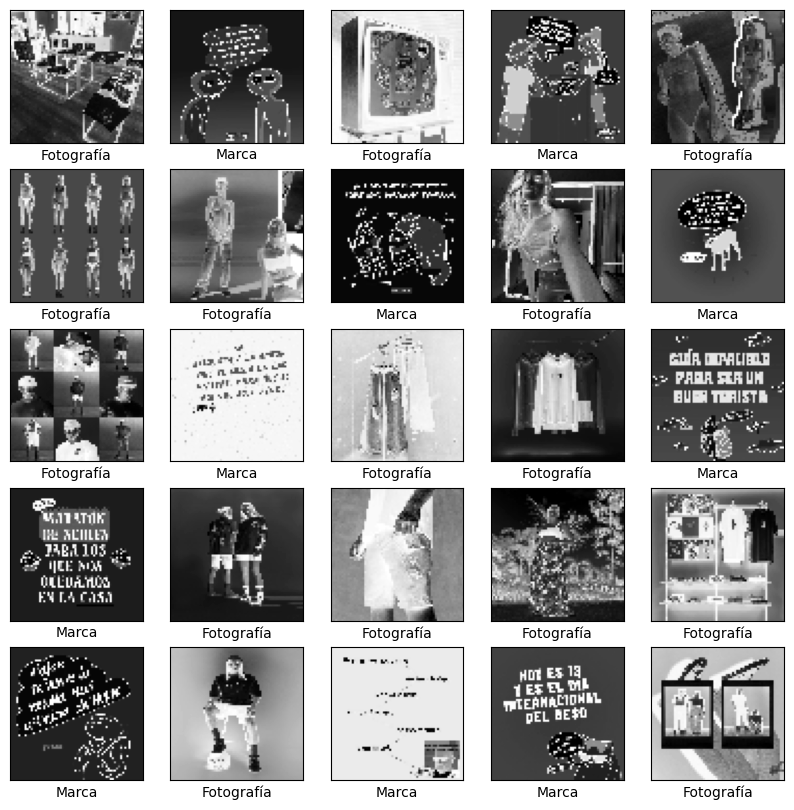

In [ ]:
#Codigo para mostrar imagenes del set, no es necesario ejecutarlo, solo imprime unos numeros :)
plt.figure(figsize=(10,10))

for i, row in (df_imagen.iterrows()):
  row['IMAGEN_COD']
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(row['IMAGEN_COD'], cmap=plt.cm.binary)
  plt.xlabel(row['ÁREA'])

plt.show()

In [ ]:
df_imagen['ÁREA'] = df_imagen['ÁREA'].str.replace('mARCA','Marca')
df_imagen['ÁREA'].unique()

array(['Fotografía', 'Marca'], dtype=object)

In [ ]:
X = df_imagen['IMAGEN']
Y = df_imagen['ÁREA']

In [ ]:
from tensorflow.keras.utils import to_categorical


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Crear un codificador
label_encoder = LabelEncoder()

# Convertir etiquetas categóricas a números enteros
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

print("Etiquetas transformadas:", y_train)

Etiquetas transformadas: [0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0
 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0
 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0
 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0
 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0
 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0
 1 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0
 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0


In [ ]:
from tensorflow.keras.utils import to_categorical

# Convertir a One-Hot Encoding
y_train = to_categorical(y_train)  # Cambia 10 por el número de clases reales
y_test = to_categorical(y_test)

print(y_train.shape)

(632, 2)


In [ ]:
import numpy as np

X_train_arrays = np.array([cargar_y_preprocesar_imagen(ruta) for ruta in X_train])

In [ ]:
X_test_arrays = np.array([cargar_y_preprocesar_imagen(ruta) for ruta in X_test])

In [ ]:
#Aumento de datos
#Variables para controlar las transformaciones que se haran en el aumento de datos
#utilizando ImageDataGenerator de keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator

rango_rotacion = 30
mov_ancho = 0.25
mov_alto = 0.25
#rango_inclinacion=15 #No uso este de momento pero si quieres puedes probar usandolo!
rango_acercamiento=[0.5,1.5]

datagen = ImageDataGenerator(
    rotation_range = rango_rotacion,
    width_shift_range = mov_ancho,
    height_shift_range = mov_alto,
    zoom_range=rango_acercamiento,
    #shear_range=rango_inclinacion #No uso este de momento pero si quieres puedes probar usandolo!
)

datagen.fit(X_train_arrays)

In [ ]:
#Modelo!
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(2, activation="softmax")  # Para 2 clases
])

modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])




c:\Users\lriverosq\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Los datos para entrenar saldran del datagen, de manera que sean generados con las transformaciones que indicamos
data_gen_entrenamiento = datagen.flow(X_train_arrays, y_train, batch_size=32)

In [ ]:
TAMANO_LOTE = 32

#Entrenar la red. Toma un buen rato! Ve por un café ;)
#Oye suscribete al canal!
print("Entrenando modelo...")
epocas=60
history = modelo.fit(
    data_gen_entrenamiento,
    epochs=epocas,
    batch_size=TAMANO_LOTE,
    validation_data=(X_train_arrays, y_train),
    steps_per_epoch=int(np.ceil(60000 / float(TAMANO_LOTE))),
    validation_steps=int(np.ceil(10000 / float(TAMANO_LOTE)))
)

print("Modelo entrenado!")

Entrenando modelo...
Epoch 1/60


c:\Users\lriverosq\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  18/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 25ms/step - accuracy: 0.5502 - loss: 0.7938

c:\Users\lriverosq\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 451us/step - accuracy: 0.5788 - loss: 0.7313 - val_accuracy: 0.6187 - val_loss: 0.6752
Epoch 2/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 264us/step - accuracy: 0.6190 - loss: 0.6761 - val_accuracy: 0.6187 - val_loss: 0.6666
Epoch 3/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 246us/step - accuracy: 0.6189 - loss: 0.6557 - val_accuracy: 0.6187 - val_loss: 0.6230
Epoch 4/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 277us/step - accuracy: 0.6218 - loss: 0.6153 - val_accuracy: 0.7801 - val_loss: 0.5347
Epoch 5/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 269us/step - accuracy: 0.7684 - loss: 0.5038 - val_accuracy: 0.7911 - val_loss: 0.4964
Epoch 6/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 264us/step - accuracy: 0.7927 - loss: 0.4816 - val_accuracy: 0.6646 - val_loss: 0.7761
Epoch 7/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 271us/step - accuracy: 0.8451 - loss: 0.4056 - val_accuracy: 0.7073 - val_loss: 0.8337
Epoch 8/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 259us/step - accuracy: 0.8387 - loss: 0.38

In [ ]:
predicciones = modelo.predict(X_test_arrays)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [ ]:
clases_predichas = np.argmax(predicciones, axis=1)


In [ ]:
pérdida, exactitud = modelo.evaluate(X_test_arrays, y_test)
print(f"Pérdida: {pérdida}, Exactitud: {exactitud}")


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7924 - loss: 1.1158
Pérdida: 0.948444128036499, Exactitud: 0.7977941036224365


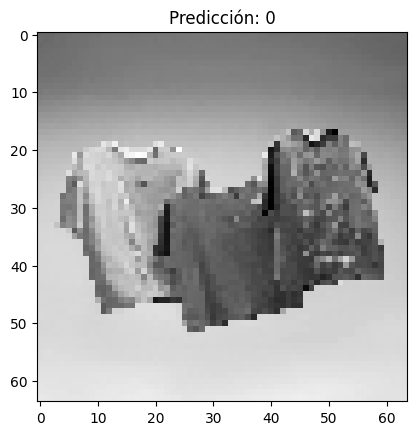

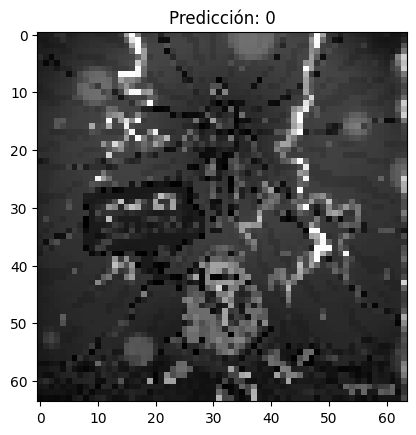

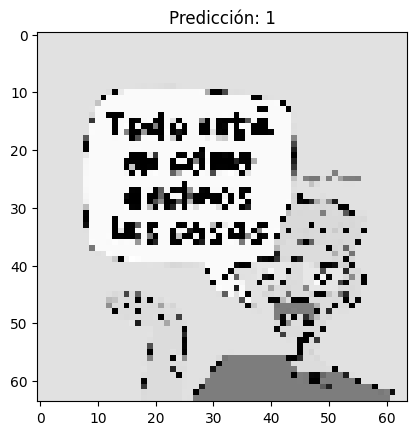

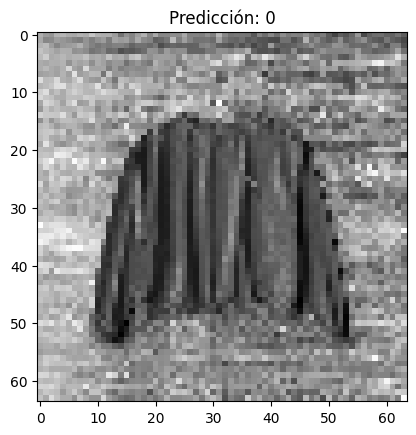

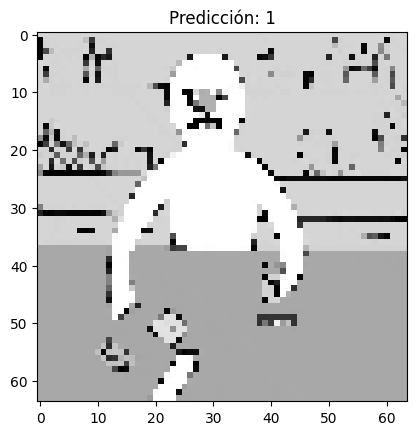

In [ ]:
import matplotlib.pyplot as plt

# Mostrar algunas imágenes de prueba junto con las predicciones
for i in range(5):  # Por ejemplo, muestra las primeras 5
    plt.imshow(X_test_arrays[i], cmap='gray')
    plt.title(f"Predicción: {clases_predichas[i]}")
    plt.show()
